## The dataset for this project can be downloaded from
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image
import os

Using TensorFlow backend.


In [5]:
data = []
labels = []

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height*width*channels

for i in range(classes):
    path = "/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/{0}/".format(i)
    print(path)
    Class = os.listdir(path)
    for a in Class:
        try:
            image = cv2.imread(path + a)
            image_from_array = Image.fromarray(image,"RGB")
            size_image = image_from_array.resize((height,width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells = np.array(data)
labels = np.array(labels)

# Randomize the order of the input images

s = np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells = Cells[s]
labels = labels[s]

/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/0/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/1/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/2/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/3/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/4/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/5/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/6/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/7/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/8/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/9/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/10/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/11/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/12/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/13/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/14/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/15/
/Users/dipit/Desktop/gtsrb-german-traffic-sign/Train/16/
/Users/dipit/Desktop/gtsrb-german-traffic

In [22]:
# Splitting the images into train and validation sets
(X_train,X_val) = Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
(y_train,y_val) = labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hot encoding from train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(32,(5,5),activation = 'relu',padding = 'same',input_shape = X_train[0].shape))
model.add(Conv2D(32,(5,5),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides =2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        2432      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 32)        25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)         

In [24]:
epochs = 10

history = model.fit(X_train,y_train,batch_size = 32,epochs = epochs,validation_data = (X_val,y_val))

Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 180s 6ms/step - loss: 1.4195 - accuracy: 0.5997 - val_loss: 0.1784 - val_accuracy: 0.9543
Epoch 2/10
31368/31368 [==============================] - 178s 6ms/step - loss: 0.2454 - accuracy: 0.9243 - val_loss: 0.0461 - val_accuracy: 0.9879
Epoch 3/10
31368/31368 [==============================] - 178s 6ms/step - loss: 0.1407 - accuracy: 0.9585 - val_loss: 0.0336 - val_accuracy: 0.9915
Epoch 4/10
31368/31368 [==============================] - 179s 6ms/step - loss: 0.1031 - accuracy: 0.9688 - val_loss: 0.0229 - val_accuracy: 0.9948
Epoch 5/10
31368/31368 [==============================] - 179s 6ms/step - loss: 0.0835 - accuracy: 0.9752 - val_loss: 0.0207 - val_accuracy: 0.9949
Epoch 6/10
31368/31368 [==============================] - 182s 6ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.0213 - val_accuracy: 0.9950
Epoch 7/10
31368/31368 [==============================] - 183s 

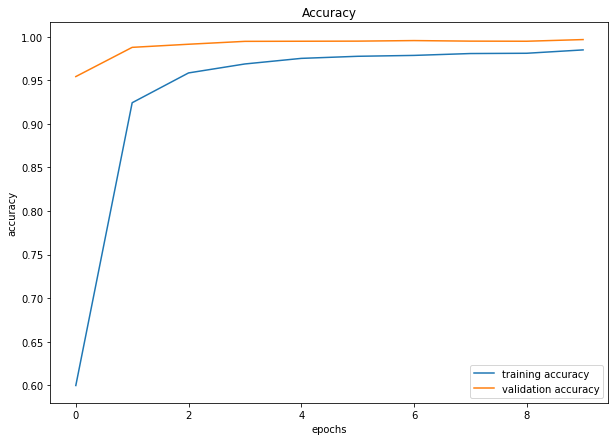

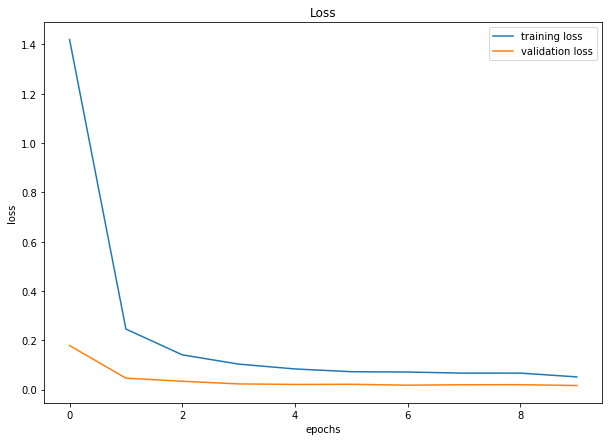

In [26]:
plt.figure(0,figsize=(10,7))
plt.plot(history.history['accuracy'],label = "training accuracy")
plt.plot(history.history['val_accuracy'],label = "validation accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure(1,figsize=(10,7))
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = "validation loss")
plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
# Predicting with the test data

y_test = pd.read_csv("/Users/dipit/Desktop/gtsrb-german-traffic-sign/Test.csv")
labels = y_test['Path'].values
y_test = y_test['ClassId'].values

data = []

for f in labels:
    image = cv2.imread("/Users/dipit/Desktop/gtsrb-german-traffic-sign/Test/" + f.replace('Test',""))
    image_from_array = Image.fromarray(image,'RGB')
    size_image = image_from_array.resize((height,width))
    data.append(np.array(size_image))
    
    
X_test = np.array(data)
X_test = X_test.astype('float32')/255
pred = model.predict_classes(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9720506730007917

predicted_sign:[33]


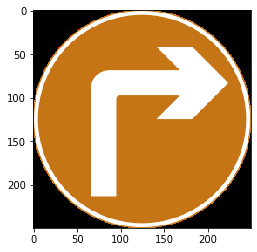

In [53]:
image = cv2.imread('/Users/dipit/Desktop/gtsrb-german-traffic-sign/mandatory-direction-ahead-turn-right.png')
plt.imshow(image)
image_from_array = Image.fromarray(image,'RGB')
size_image = image_from_array.resize((height,width))
image = np.array(size_image)
image = image.astype('float32')/255
image = image.reshape(1,30,30,3)
print('predicted_sign:' + str(model.predict_classes(image)))

predicted_sign:[34]


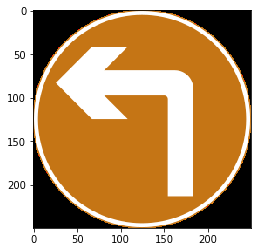

In [54]:
image = cv2.imread('/Users/dipit/Desktop/gtsrb-german-traffic-sign/mandatory.png')
plt.imshow(image)
image_from_array = Image.fromarray(image,'RGB')
size_image = image_from_array.resize((height,width))
image = np.array(size_image)
image = image.astype('float32')/255
image = image.reshape(1,30,30,3)
print('predicted_sign:' + str(model.predict_classes(image)))